In [60]:
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
stscaler = StandardScaler()

# data preprocessing

In [64]:
# load data
train = pd.read_csv('./datas/train.csv')
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [65]:
# Generate data for graph verification
train_showplt = train.copy()
train_showplt.drop(['ID','Height(Remainder_Inches)','Weight_Status'], axis=1, inplace=True)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15448\1740888089.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(train_showplt.corr(), 2), annot=True, cmap='coolwarm')


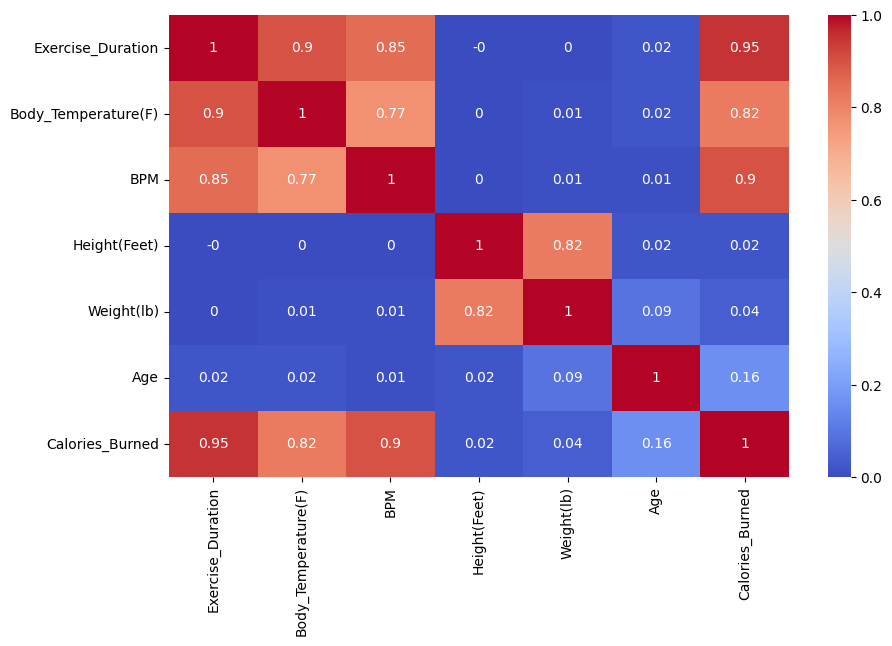

In [66]:
# check sns
plt.figure(figsize=(10, 6))
sns.heatmap(round(train_showplt.corr(), 2), annot=True, cmap='coolwarm')
plt.show()

In [3]:
def preprocessing(data):
  # Feet inch pound kilo arrangement
  data['Height_cm'] = (data['Height(Feet)'] * 30.48) + \
      (data['Height(Remainder_Inches)'] * 2.54)
  data['Weight_kg'] = data['Weight(lb)'] * 0.453592

  # drop inches feet lb id
  data.drop(['Height(Feet)', 'Height(Remainder_Inches)',
              'Weight(lb)', 'ID'], axis=1, inplace=True)
  
  # outliers delete
  def clean_out(data):
    for i in data.colums:
      if isinstance(data[i][0],str):
        continue
      q_min = data[i].quantile(0.25)
      q_max = data[i].quantile(0.75)
      iqr = q_max - q_min
      lower_bound = q_min - 1.5 * iqr
      upper_bound = q_max + 1.5 * iqr
      data.loc[(data[i] > upper_bound) | (data[i] < lower_bound), i] = np.nan
    return data

      
  # bmr car
  def calculate_bmr(row):
    if row['Gender'] == 'M':
        bmr = 88.36 + (13.4 * row['Weight_kg']) + \
            (4.8 * row['Height_cm']) - (5.7 * row['Age'])
    else:
        bmr = 447.6 + (9.2 * row['Weight_kg']) + \
            (3.1 * row['Height_cm']) - (4.3 * row['Age'])
    return bmr
  
  # bmr car apply
  data['BMR'] = data.apply(calculate_bmr, axis=1)

  # get_dummies
  data = pd.get_dummies(data, columns=['Gender', 'Weight_Status'])
  
  return pd.DataFrame(data)

In [1]:
# Load the data
train = preprocessing(pd.read_csv('./datas/train.csv'))
print(train.columns)

# check sns
plt.figure(figsize=(10, 6))
train_showplt = train[['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Age', 'Height_cm', 'Weight_kg', 'BMR',
                       'Gender_F', 'Gender_M', 'Weight_Status_Normal Weight', 'Weight_Status_Obese', 'Weight_Status_Overweight']]
sns.heatmap(round(train_showplt.corr(), 2), annot=True, cmap='coolwarm')
plt.show()

NameError: name 'preprocessing' is not defined

Index(['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Age',
       'Calories_Burned', 'Height_cm', 'Weight_kg', 'BMR', 'Gender_F',
       'Gender_M', 'Weight_Status_Normal Weight', 'Weight_Status_Obese',
       'Weight_Status_Overweight'],
      dtype='object')


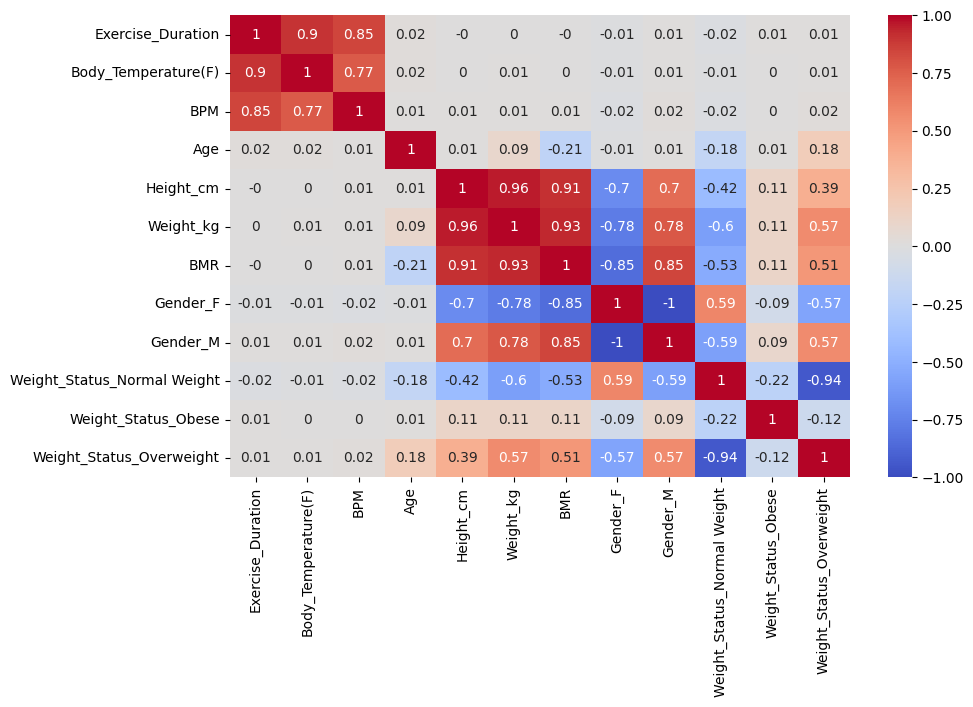

In [9]:




# data scalering
train_X = train
train_y = train.pop('Calories_Burned')
train_X = stscaler.fit_transform(train_X)



StandardScaler()

## 제출

In [ ]:
test = preprocessing(pd.read_csv('./datas/test.csv'))


In [ ]:
# Split the features and target variable
train = preprocessing(pd.read_csv('./datas/train.csv'))
test = preprocessing(pd.read_csv('./datas/test.csv'))

train_x= train.pop('Calories_Burned')
train_y = train['Calories_Burned']
test_x = test.pop('Calories_Burned')



In [ ]:
def get_data():
  train = pd.read_csv('./datas/train.csv')
  test = pd.read_csv('./datas/test.csv')
  
  # train에서 ID,Calories_Burned 제거, 원본 데이터 유지를 위해 inplace 생략
  train.drop('ID', axis=1, inplace=True)
  test.drop('ID', axis=1, inplace=True)
  
  # combine feet and inches columns into a single column for height
train['Height_cm'] = (train['Height(Feet)'] * 30.48) + \
    (train['Height(Remainder_Inches)'] * 2.54)
test['Height_cm'] = (test['Height(Feet)'] * 30.48) + \
    (test['Height(Remainder_Inches)'] * 2.54)
  
  

In [14]:
PATH = './datas'

train_data = pd.read_csv('./datas/train.csv')
test_data = pd.read_csv('./datas/test.csv')
train_data


,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


In [4]:
train_data = pd.read_csv('./datas/train.csv')
test_data = pd.read_csv('./datas/test.csv')

In [5]:
train_data.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [ ]:
train_data.drop(['ID', 'Height(Remainder_Inches)'], axis=1, inplace=True)
test_data.drop(['ID', 'Height(Remainder_Inches)'], axis=1, inplace=True)

train_data = pd.get_dummies(train_data, columns=['Gender', 'Weight_Status'])
test_data = pd.get_dummies(test_data, columns=['Gender', 'Weight_Status'])
